In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
def find_fit(edges, **args):
    points = []
    y, x = edges.shape
    it = np.nditer(edges, flags=['multi_index'])
    for p in it:
        if p > 0:
            points.append(it.multi_index)
    points = np.array(points) / [y, x]
    X = points[:, 1]
    Y = points[:, 0]
    alf, b = np.linalg.lstsq(np.vstack([X, np.ones(len(X))]).T, Y, rcond=2)[0]
    std = np.sqrt(np.mean((alf * X + b - Y)**2))
    if args.get('plot') == True:
        plt.plot(X, Y, 'o', label='Original data', markersize=3)
        plt.plot(X, alf * X + b, 'r', label='Fitted line')
        plt.plot(X, alf * X + b + std, 'r', label='Fitted line')
        plt.legend()
        plt.show()
    return alf, b, std

In [3]:
def turn_crop(im, alf, b, std, **args):
    w = args.get('width', 4)
    up = max(b, b + alf)
    down = min(b, b + alf)
    y,x = im.shape
    up = int(np.clip(up + w * std, 0, 1) * y)
    down = int(np.clip(down - w * std, 0, 1) * y)
    cr_im = im[down:up,:]
    y_new =cr_im.shape[0]
    M = cv2.getRotationMatrix2D([x/2,y_new/2], np.arctan(alf * y / x) * 180 / np.pi, 1)
    rotated = cv2.warpAffine(cr_im,
                             M, [cr_im.shape[1], cr_im.shape[0]],
                             borderMode=cv2.BORDER_REPLICATE)
    y_min = int(y_new / 2 - 4 * std * y)
    y_max = int(y_new / 2 + 4 * std * y)
    rotated = rotated[y_min:y_max]
    if args.get('plot') == True:
        plt.imshow(rotated)
        plt.show()
    return rotated

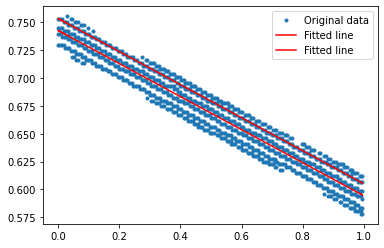

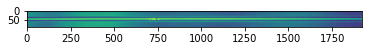

In [29]:
im = cv2.imread('testPic/im40.0.jpg', cv2.IMREAD_GRAYSCALE)
y, x = im.shape
kof = 5
im4 = cv2.resize(im, dsize=(y // kof, x // kof))
edges = cv2.Canny(im4, 100, 90, L2gradient=True)
alf, b, std = find_fit(edges, plot=True)
rotated = turn_crop(im, alf, b, std, w=4, plot=True)


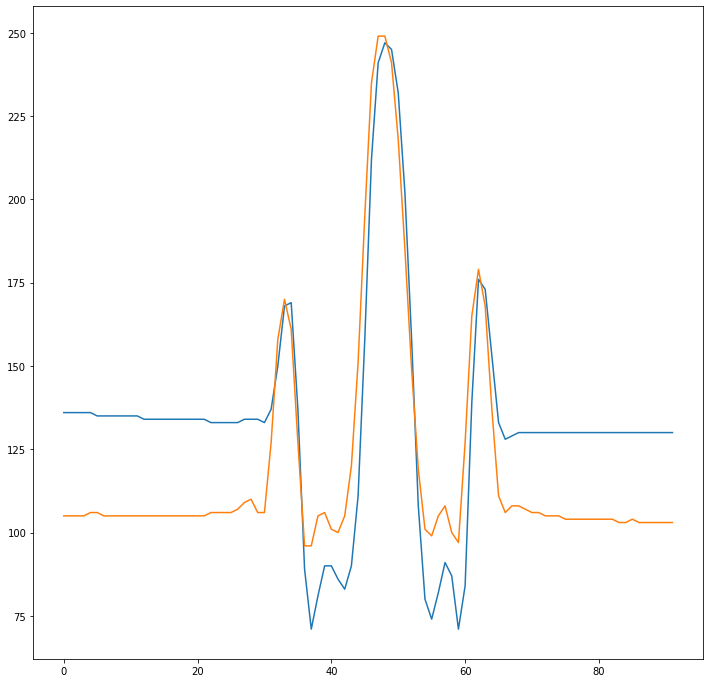

In [30]:
plt.figure(figsize=(12, 12))
plt.plot(cv2.blur(rotated,(500,1))[:,range(0,1920,1080)])